In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler,RobustScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [3]:
train = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')

In [4]:
df = train.copy()

In [5]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print('the feature {} has {} unique categories'.format(col_name, unique_cat))

the feature TransactionId has 95662 unique categories
the feature BatchId has 94809 unique categories
the feature AccountId has 3633 unique categories
the feature SubscriptionId has 3627 unique categories
the feature CustomerId has 3742 unique categories
the feature CurrencyCode has 1 unique categories
the feature ProviderId has 6 unique categories
the feature ProductId has 23 unique categories
the feature ProductCategory has 9 unique categories
the feature ChannelId has 4 unique categories
the feature TransactionStartTime has 94556 unique categories


In [7]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [8]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [10]:
data = df.copy()

In [11]:
data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [12]:
data.FraudResult.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [13]:
majority_class = data[data.FraudResult == 0]

In [14]:
minority_class = data[data.FraudResult == 1]

In [15]:
len(minority_class)

193

In [16]:
minority_class_upsampled = resample(minority_class, replace=True, n_samples = len(majority_class),
                                   random_state = 42)

In [17]:
len(minority_class_upsampled)

95469

In [18]:
df_upsampled = pd.concat([majority_class, minority_class_upsampled])

In [19]:
df_upsampled.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [20]:
df_ = df_upsampled.copy()

In [21]:
for col_name in df_.columns:
    if df_[col_name].dtype == 'object':
        unique_val = len(df_[col_name].unique())
        print('the unique values are {} and are numbered {}'.format(col_name, unique_val))

the unique values are TransactionId and are numbered 95662
the unique values are BatchId and are numbered 94809
the unique values are AccountId and are numbered 3633
the unique values are SubscriptionId and are numbered 3627
the unique values are CustomerId and are numbered 3742
the unique values are CurrencyCode and are numbered 1
the unique values are ProviderId and are numbered 6
the unique values are ProductId and are numbered 23
the unique values are ProductCategory and are numbered 9
the unique values are ChannelId and are numbered 4
the unique values are TransactionStartTime and are numbered 94556


In [29]:
len(df_.TransactionStartTime)

190938

In [22]:
lbl = LabelEncoder()


In [23]:
df_['ProviderId'] = lbl.fit_transform(df_.ProviderId)
df_.ProductId = lbl.fit_transform(df_.ProductId)
df_.ProductCategory = lbl.fit_transform(df_.ProductCategory)
df_.ChannelId = lbl.fit_transform(df_.ChannelId)

In [24]:
df_.PricingStrategy.value_counts(ascending = False)

2    148413
4     19049
0     18236
1      5240
Name: PricingStrategy, dtype: int64

In [26]:
df_.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [31]:
df_.ChannelId.value_counts()

2    147693
1     39643
0      2554
3      1048
Name: ChannelId, dtype: int64

In [32]:
df_['Num of Hours'] = pd.DatetimeIndex(df_['TransactionStartTime']).hour

In [33]:
df_['year'] = pd.DatetimeIndex(df_['TransactionStartTime']).year

In [34]:
df_['year'].value_counts()

2019    105462
2018     85476
Name: year, dtype: int64

In [35]:
df_['month'] = pd.DatetimeIndex(df_['TransactionStartTime']).month

In [64]:
df_['weekday'] = pd.DatetimeIndex(df_['TransactionStartTime']).weekday_name

In [65]:
df_.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'Num of Hours', 'year',
       'month', 'weekday'],
      dtype='object')

In [40]:
df_.CurrencyCode = lbl.fit_transform(df_.CurrencyCode)

In [66]:
df_.weekday = lbl.fit_transform(df_.weekday)

In [67]:
df_use = df_[['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
        'PricingStrategy', 'Num of Hours', 'year','weekday',
       'month']]

In [37]:
df_ = df_.drop('FraudResult', axis= 'columns')

In [68]:
df_corr = df_use.corr()

In [69]:
df_corr['Value'].sort_values()

ProviderId        -0.336126
ProductId         -0.245826
PricingStrategy   -0.193248
month             -0.126554
Num of Hours      -0.036082
weekday            0.038710
ProductCategory    0.107498
year               0.147383
ChannelId          0.205174
Amount             0.997012
Value              1.000000
CurrencyCode            NaN
CountryCode             NaN
Name: Value, dtype: float64

In [45]:
std = StandardScaler()

In [70]:
df_std = std.fit_transform(df_use)

C:\Users\9470m\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\9470m\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


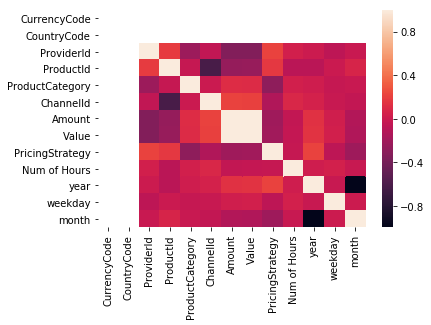

In [71]:
sns.heatmap(df_corr)

In [52]:
log_reg = LogisticRegression()

In [97]:
log_reg.fit(df_use, df_label)

C:\Users\9470m\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
log_reg.score(df_use, df_label)

0.9828844965381432

In [115]:
dsc = DecisionTreeClassifier()

In [133]:
dstd = DecisionTreeClassifier()

In [134]:
dstd.fit(df_std, df_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [139]:
dstd.score(df_std, df_label)

0.9999633388848737

In [116]:
dsc.fit(df_use, df_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [117]:
dsc.score(df_use, df_label)

0.9999633388848737

In [118]:
rmd = RandomForestClassifier()

In [119]:
rmd.fit(df_use, df_label)

C:\Users\9470m\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [120]:
rmd.score(df_use, df_label)

0.9999581015827127

In [141]:
svc = SVC()

In [ ]:
svc.fit(df_use, df_label)

In [ ]:
svc.score(df_use, df_label)

In [100]:
pred = log_reg.predict(df_use)

In [101]:
print(confusion_matrix(df_label, pred))

[[94733   736]
 [ 2532 92937]]


In [102]:
print(f1_score(df_label, pred))

0.9827219760814626


In [103]:
print(classification_report(df_label, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     95469
           1       0.99      0.97      0.98     95469

   micro avg       0.98      0.98      0.98    190938
   macro avg       0.98      0.98      0.98    190938
weighted avg       0.98      0.98      0.98    190938



In [104]:
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [60]:
df1 = test_df.copy()

In [61]:
df1.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy'],
      dtype='object')

In [78]:
df_use.columns

Index(['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value', 'PricingStrategy',
       'Num of Hours', 'year', 'weekday', 'month'],
      dtype='object')

In [63]:
df1['Num of Hours'] = pd.DatetimeIndex(df1.TransactionStartTime).hour

In [79]:
df1['year'] = pd.DatetimeIndex(df1.TransactionStartTime).year
df1['month'] = pd.DatetimeIndex(df1.TransactionStartTime).month
df1['weekday'] = pd.DatetimeIndex(df1.TransactionStartTime).weekday_name

In [89]:
df1.weekday = lbl.fit_transform(df1.weekday)

In [80]:
df1['ProviderId'] = lbl.fit_transform(df1.ProviderId)
df1.ProductId = lbl.fit_transform(df1.ProductId)
df1.ProductCategory = lbl.fit_transform(df1.ProductCategory)
df1.ChannelId = lbl.fit_transform(df1.ChannelId)
df1.CurrencyCode = lbl.fit_transform(df1.CurrencyCode)

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 19 columns):
TransactionId           45019 non-null object
BatchId                 45019 non-null object
AccountId               45019 non-null object
SubscriptionId          45019 non-null object
CustomerId              45019 non-null object
CurrencyCode            45019 non-null int32
CountryCode             45019 non-null int64
ProviderId              45019 non-null int32
ProductId               45019 non-null int32
ProductCategory         45019 non-null int32
ChannelId               45019 non-null int32
Amount                  45019 non-null float64
Value                   45019 non-null int64
TransactionStartTime    45019 non-null object
PricingStrategy         45019 non-null int64
Num of Hours            45019 non-null int64
year                    45019 non-null int64
month                   45019 non-null int64
weekday                 45019 non-null object
dtypes: float64(1), int32(5

In [83]:
df1.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'Num of Hours', 'year',
       'month', 'weekday'],
      dtype='object')

In [90]:
df1_use = df1[['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'Num of Hours', 'year',
       'month', 'weekday']]

In [132]:
df1_std = std.fit_transform(df1_use)

C:\Users\9470m\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\9470m\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [126]:
remd_predict = rmd.predict(df1_use)
remd_predict = pd.Series(remd_predict, name= 'FraudResult')

In [ ]:
rmd_std = dsc.fit()

In [136]:
dsc_std = dstd.predict(df1_std)
dsc_std = pd.Series(dsc_std, name='FraudResult')

In [128]:
dsc_pred = dsc.predict(df1_use)
dsc_pred = pd.Series(dsc_pred, name='FraudResult')

In [105]:
log_predict = log_reg.predict(df1_use)

In [106]:
log_predict = pd.Series(log_predict, name= 'FraudResult')

In [107]:
trans_id = test_df['TransactionId']

In [108]:
trans_id = trans_id.to_frame()

In [127]:
sub1 = trans_id.join(remd_predict, how = 'left')

In [129]:
sub2 = trans_id.join(dsc_pred, how='left')

In [109]:
sub = trans_id.join(log_predict, how= 'left')

In [111]:
sub.to_csv('logistic_reg.csv', index= False)

In [130]:
sub2.to_csv('dsc_pred.csv', index=False)

In [131]:
sub1.to_csv('rmf_pred.csv', index = False)

In [137]:
sub_std = trans_id.join(dsc_std, how='left')

In [138]:
sub_std.to_csv('scaled_dsc.csv', index=False)